In [1]:
import pandas as pd
data = pd.read_csv(r'../data/spi_vci/spi_vci_daily.csv').iloc[:, 1:]

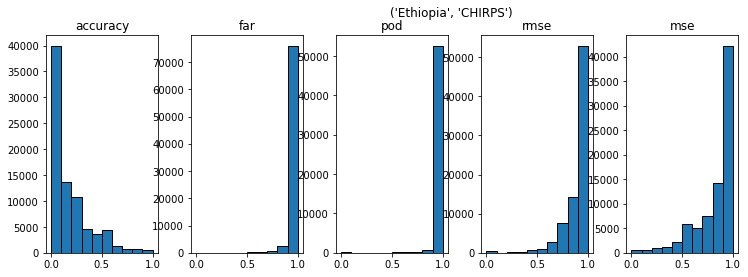

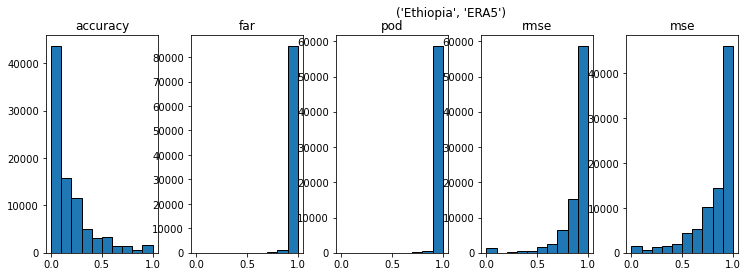

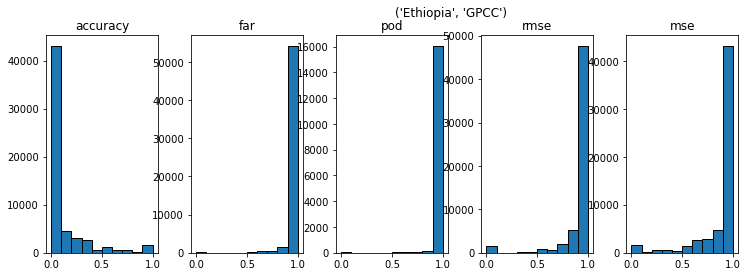

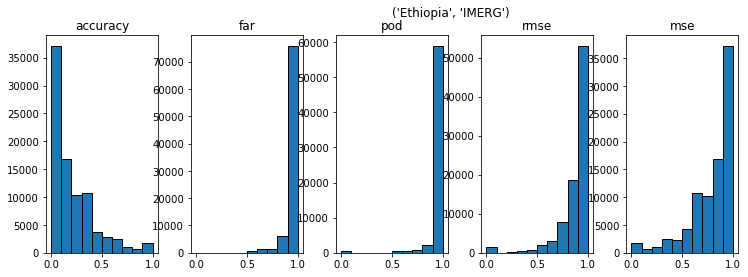

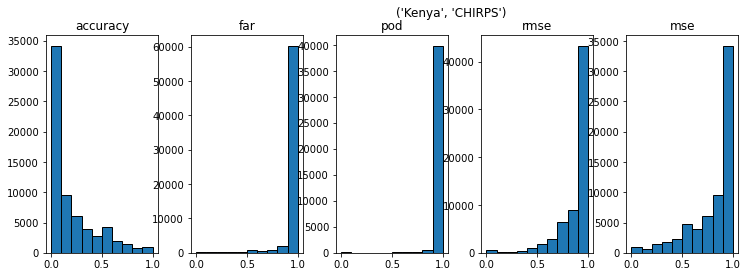

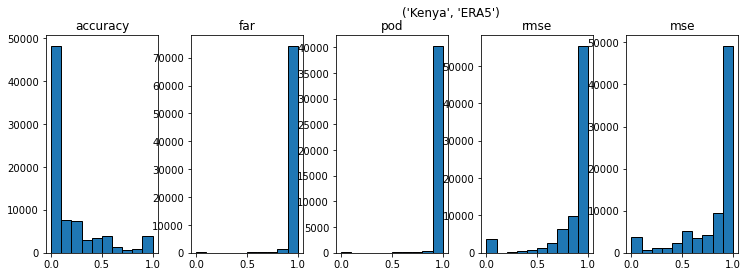

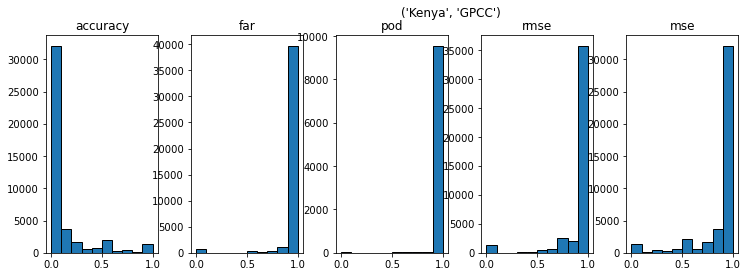

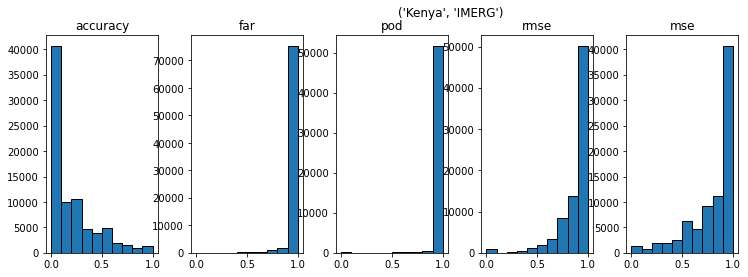

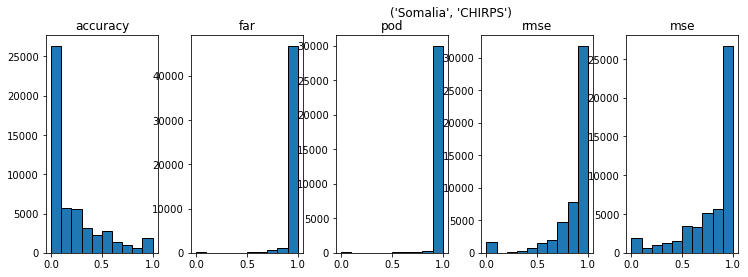

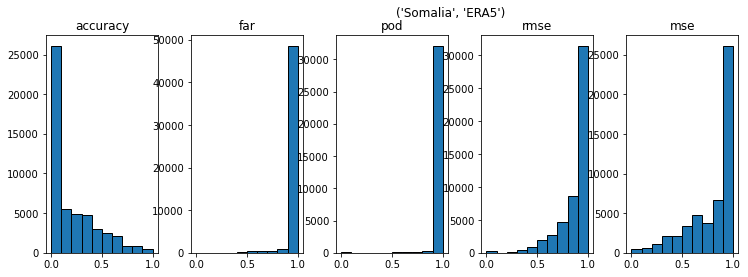

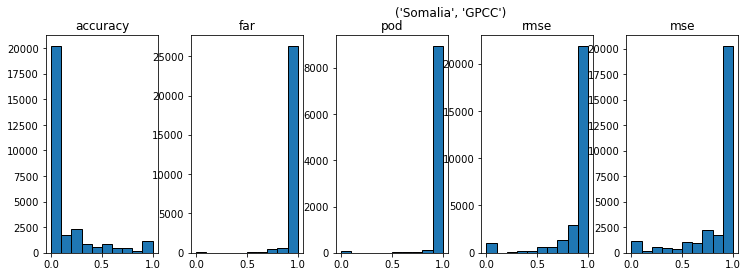

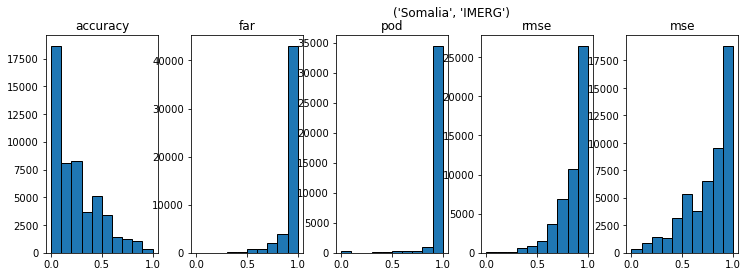

In [2]:
for idx, df in data.drop(columns={'precp_idx','land_cat','time'}).groupby(['country','product']):
        # plot a hist for each column
    axes = df.hist(layout=(1, 6), figsize=(15, 4), ec='k', grid=False)

    #df.plot(layout=(1, 6), kind='kde', ax=axes, secondary_y=True)

    # extract the figure object from the array of axes
    fig = axes[0][0].get_figure()

    # add the gender as the title
    fig.suptitle(idx)

In [20]:
sub_df = data.loc[data['precp_idx']=="spi_gamma_30"]

In [21]:
import seaborn as sns
df = sub_df.groupby(['description','country','product']).mean()[['far','pod','accuracy']]
df.style.background_gradient(cmap='Blues')


In [48]:
sub_df

,accuracy,far,pod,rmse,mse,time,product,veg_idx,precp_idx,land_cat,country,description
0,0.00000,1.0,NaN,1.000000,1.00000,2005-01-01,IMERG,vci,spi_gamma_30,20,Ethiopia,Shrubs
1,0.00000,1.0,NaN,1.000000,1.00000,2005-01-02,IMERG,vci,spi_gamma_30,20,Ethiopia,Shrubs
2,0.00000,1.0,NaN,1.000000,1.00000,2005-01-03,IMERG,vci,spi_gamma_30,20,Ethiopia,Shrubs
3,0.00000,1.0,NaN,1.000000,1.00000,2005-01-04,IMERG,vci,spi_gamma_30,20,Ethiopia,Shrubs
4,0.00346,1.0,1.0,0.998268,0.99654,2005-01-05,IMERG,vci,spi_gamma_30,20,Ethiopia,Shrubs
...,...,...,...,...,...,...,...,...,...,...,...,...
1068205,0.30000,1.0,1.0,0.836660,0.70000,2009-12-27,ERA5,vci,spi_gamma_30,112,Kenya,"Closed forest, evergreen broad leaf"
1068206,0.20000,1.0,1.0,0.894427,0.80000,2009-12-28,ERA5,vci,spi_gamma_30,112,Kenya,"Closed forest, evergreen broad leaf"
1068207,0.30000,1.0,1.0,0.836660,0.70000,2009-12-29,ERA5,vci,spi_gamma_30,112,Kenya,"Closed forest, evergreen broad leaf"
1068208,0.10000,1.0,1.0,0.948683,0.90000,2009-12-30,ERA5,vci,spi_gamma_30,112,Kenya,"Closed forest, evergreen broad leaf"


<Figure size 432x288 with 0 Axes>

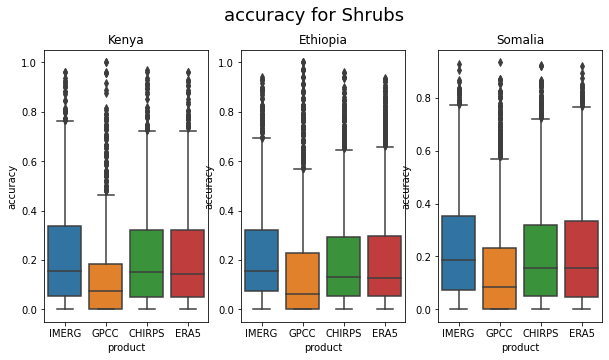

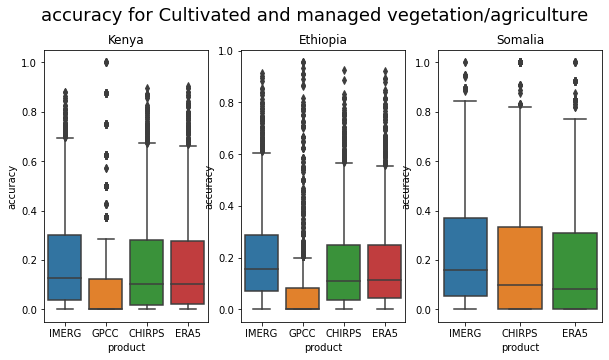

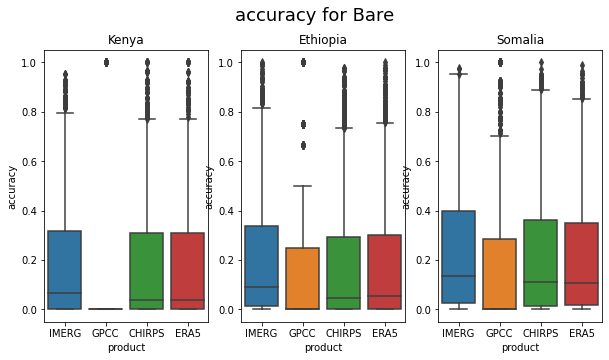

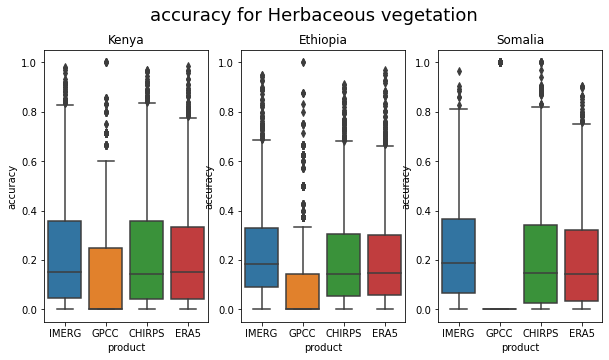

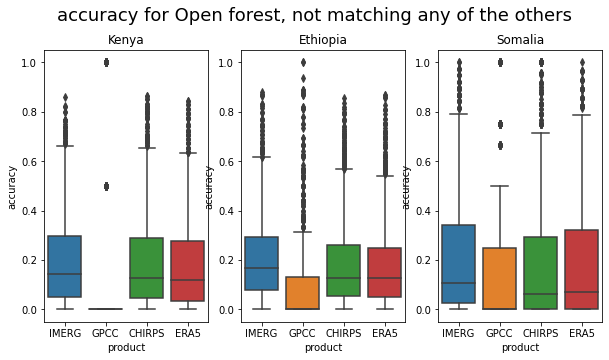

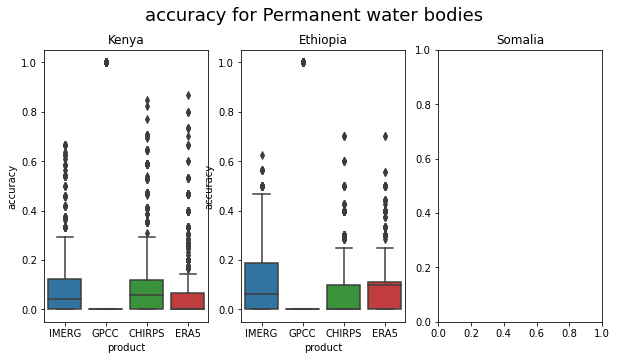

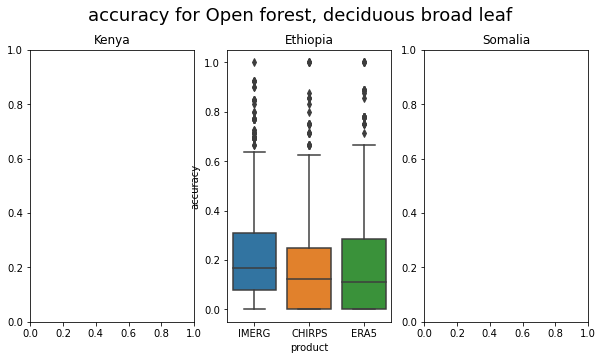

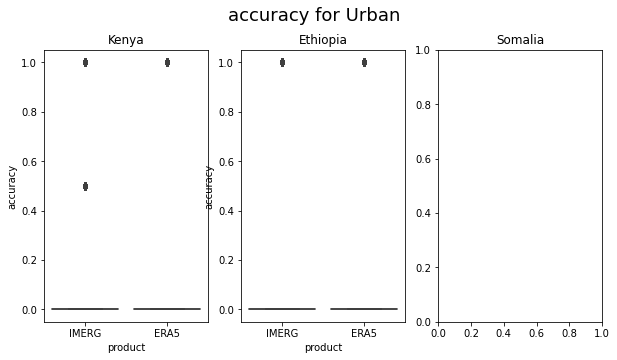

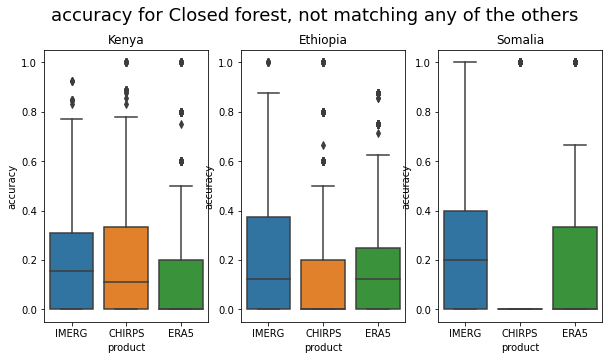

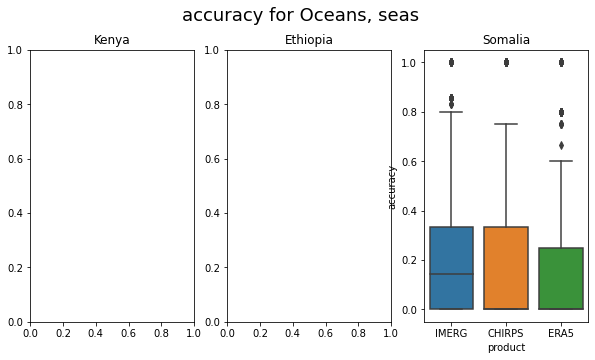

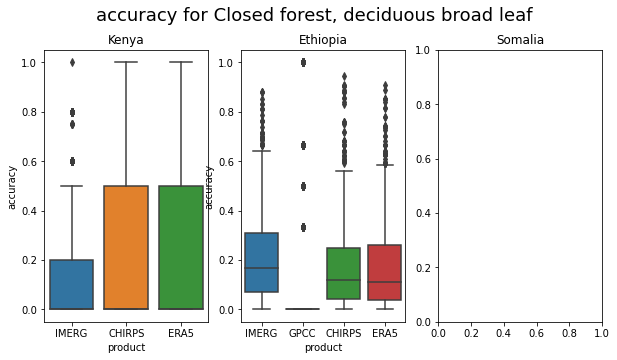

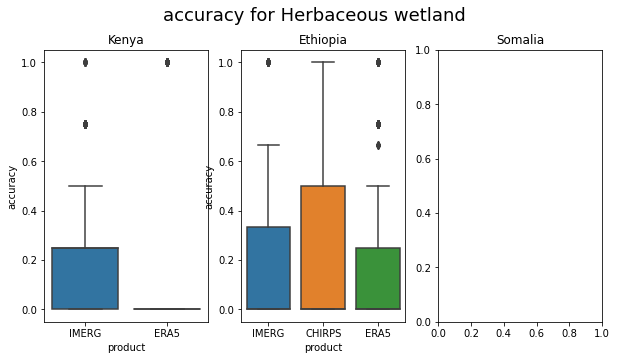

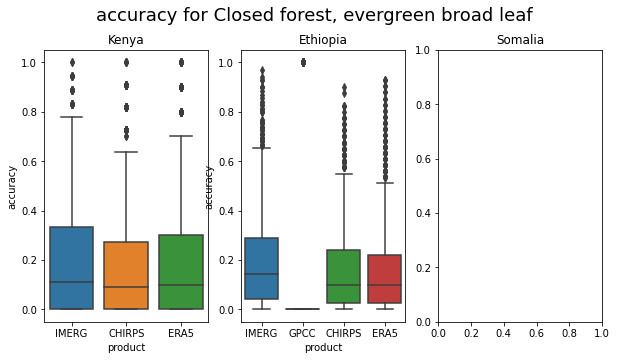

In [116]:
import matplotlib.pyplot as plt

plt.subplots_adjust(wspace=0.8)
plt.subplots_adjust(hspace=0.5)


countries = ['Kenya','Ethiopia','Somalia']
for i, soil in enumerate(sub_df["description"].unique()):
    for metric in ['accuracy']:
        fig, axes = plt.subplots(1, 3, figsize=(10,5))
        for country, ax in zip(countries, axes.ravel()):
            plt.suptitle(f"{metric} for {soil}", fontsize=18, y=1)

            new_df = sub_df.loc[(sub_df["country"]==country) & (sub_df["description"]==soil)].dropna(subset=[metric])
            if len(new_df)>0:
                sns.boxplot(data = new_df, y=metric, x='product', ax=ax)
            ax.set_title(f"{country}")
        plt.show()